<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-метрики-AUC-ROC" data-toc-modified-id="Исследование-метрики-AUC-ROC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование метрики AUC-ROC</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

«Бета-Банка» теряет клиентов, каждый месяц стало уходить небольшое количество клиентов.  Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Предоставлены данные о поведении клиентов и расторжении договоров с банком.

Цель исследования: построить модель способную наиболее правильно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Задачи:
1. Выполнить подготовку данных
2. Устранить дисбаланс данных
3. Постройте модель с предельно большим значением *F1*-меры(довести метрику до 0.59).
4. Измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.


## 1.1 Подготовка данных

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('C:/Users/Lubov/jupyter/ds/Churn.csv' or '/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data['Gender'].value_counts()#рассмотрю некоторые данные

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
data['Exited'].value_counts()#рассмотрю некоторые данные

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data['Geography'].value_counts()#рассмотрю некоторые данные

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isna().sum()#посмотрю наличие пропусков

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

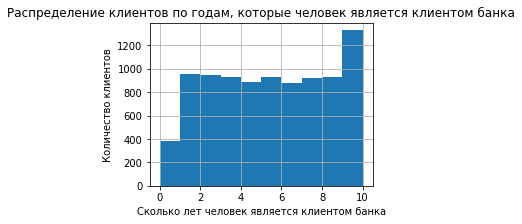

In [10]:
data['Tenure'].plot(kind ='hist',bins=10,title ='Распределение клиентов по годам, которые человек является клиентом банка',\
                    grid =True,figsize = (4,3))#рассмотрю распределение до заполнения пропусков
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel("Количество клиентов")
data['Tenure'].describe()

In [12]:
data = data.dropna(subset=['Tenure'])
print(data.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

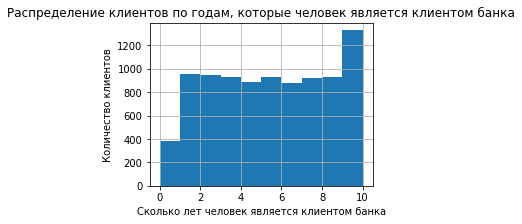

In [13]:
data['Tenure'].plot(kind ='hist',bins=10,title ='Распределение клиентов по годам, которые человек является клиентом банка',\
                    grid =True,figsize = (4,3))#рассмотрю распределение после заполнения пропусков медианой
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel("Количество клиентов")
data['Tenure'].describe()

In [14]:
data.duplicated().sum()#проверю на полные дупликаты

0

Для избежания мультиколлинеарности, рассмотрим матрицу корреляции

In [15]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004289,0.002330,0.000681,-0.007322,-0.005921,0.009078,0.001248,0.009536,-0.004854,-0.014562
CustomerId,0.004289,1.000000,-0.001610,0.010379,-0.021418,-0.007445,0.014604,-0.019891,0.001499,0.010029,-0.007040
CreditScore,0.002330,-0.001610,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
Age,0.000681,0.010379,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.005921,-0.007445,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
NumOfProducts,0.009078,0.014604,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
HasCrCard,0.001248,-0.019891,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
IsActiveMember,0.009536,0.001499,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
EstimatedSalary,-0.004854,0.010029,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029


Нет линейно коррелируемых друг с другом переменных (очень слабая корреляция).

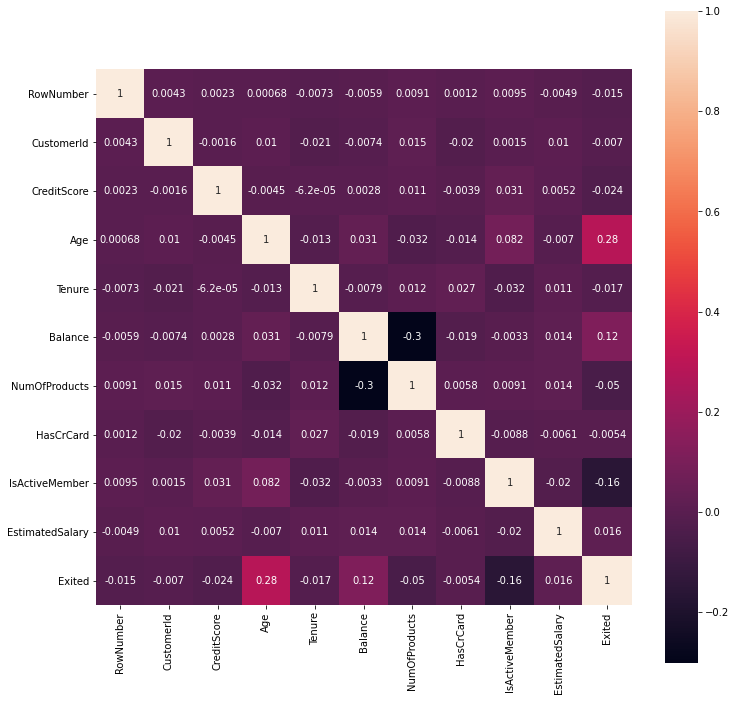

In [16]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, square=True);

Для анализа не нужны все столбцы, считаю столбцы 'RowNumber','EstimatedSalary','CustomerId','Surname' не влияют на анализ, удалю их. 

In [17]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)#удаляю лишние столбцы

In [18]:
data.head()#проверка

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Применяем технику One hot encoder для избавления от категориальных переменных, их две 'Geography' и	'Gender'.	

In [19]:
data_ohe=pd.get_dummies(data,drop_first=True) #избавляюсь от категориальных признаков

Объявлю две переменные: features — признаки и target — целевой признак.

In [20]:
features = data_ohe.drop('Exited',axis=1)
target = data_ohe['Exited']

Разделю набор данных на обучающую (train) и валидационную (valid) выборки. В random_state значение 12345, stratify=target чтобы сохранить соотношение классов при разбиении.

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4,random_state=12345, stratify=target)

Разделю валидационную выборку на валидационную и тестову. В валидационной выборке — 50% валидационных данных. В random_state  значение 12345, stratify=target чтобы сохранить соотношение классов при разбиении. 
В итоге получается соотношение тренировочные/валидационные/тестовые=60/20/20

In [22]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,random_state=12345, stratify=target_valid)

In [23]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(5454, 11)

(5454,)

(1818, 11)

(1818,)

(1819, 11)

(1819,)

In [24]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9723,526,32,7.0,125540.05,1,0,0,86786.41,0,0,1
1224,500,47,8.0,128486.11,1,1,0,179227.12,0,1,0
8377,802,40,4.0,0.00,2,1,1,81908.09,0,1,1
8014,731,39,2.0,126816.18,1,1,1,74850.93,0,1,0
2491,612,26,4.0,0.00,2,1,1,179780.74,0,1,0


У признаков разный масштаб, их нужно стандартизировать  методом StandardScaler()

In [25]:
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])

features_test[numeric]=scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment=None

/tmp/ipykernel_117/3603164570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric]=scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [26]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9723,-1.292898,-0.660843,0.686341,0.786636,-0.910943,0,0,-0.223548,0,0,1
1224,-1.563714,0.778434,1.034232,0.833795,-0.910943,1,0,1.383021,0,1,0
8377,1.581914,0.106771,-0.357331,-1.222967,0.789359,1,1,-0.308331,0,1,1
8014,0.842379,0.010820,-1.053112,0.807063,-0.910943,1,1,-0.430980,0,1,0
2491,-0.397123,-1.236554,-0.357331,-1.222967,0.789359,1,1,1.392642,0,1,0


## 1.2 Исследование задачи

Рассмотрю модель Случайный лес

In [27]:
best_model = None
best_result = 0
max_depth = 0
best_est = 0
for max_depth in range(1,20):
    for est in range(1, 71, 10):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, n_estimators=est) 
        model_forest.fit(features_train, target_train)#обучу модель на тренировочной выборке
        prediction = model_forest.predict(features_valid)
        result = f1_score(target_valid,prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            max_depth = max_depth
            best_est = est
print('best_depth:',max_depth, 'n_estimators', est, 'F1:', best_result)

probabilities_forest = best_model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds = roc_curve(target_valid,probabilities_one_valid_forest)
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
print('Auc_roc:', auc_roc_forest)

best_depth: 19 n_estimators 61 F1: 0.6245954692556633
Auc_roc: 0.8657059777921418


Вывод: лучшее значение F1=0,62, при котором max_depth=19, n_estimators=61, Auc_roc=0,87

Рассмотрю модель Логистическая регрессия

In [28]:
model_logistic=LogisticRegression(random_state=12345, solver='lbfgs')
model_logistic.fit(features_train,target_train)
prediction = model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

probabilities_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_logistic = probabilities_logistic[:,1]
fpr_logistic,tpr_logistic,thresholds = roc_curve(target_valid,probabilities_one_valid_logistic)
auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_valid_logistic)
print('Auc_roc:', auc_roc_logistic)

F1: 0.3306772908366534
Auc_roc: 0.7893382907660986


### 1.2.1 Вывод: 


при рассмотрении данных с дисбалансом среди моделей Дерево решений и логистическая регрессия, лучшей моделью оказалось Дерево решений F1 мера=0,62, Auc_roc=0,87 на валидационной выборке, у логистической регрессии F1 мера = 0,33, Auc_roc=0,79.

## 2. Борьба с дисбалансом

In [29]:
data['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

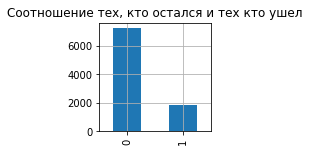

In [30]:
data['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(2,2),title='Соотношение тех, кто остался и тех кто ушел');#гистограма значений оттока и оставшихся клиентов

Соотношение тех, кто остался и тех, кто колонка "Exited" ушел примерно 1 к 4, в данных присутствует явный дисбаланс, нужно с этим поработать.
Использую функцию Upsamping для увеличения количества клиентов оттока (где data['Exited'] ==1)

In [31]:
def upsampling (features,target,repeat):
    target_one = target[target==1]#разделяю обучающую выборку на отрицательные и положительные объекты
    target_zeros = target[target==0]
    features_one = features[target==1]
    features_zeros = features[target==0]
    
    features_upsampling = pd.concat([features_zeros]+[features_one]*repeat)#копирую положит. объекты и создаю нов. обуч. выборку
    target_upsampling = pd.concat([target_zeros]+[target_one]*repeat)
    
    features_upsampling, target_upsampling = shuffle(features_upsampling, target_upsampling,random_state=1234)#перемешаю данные
    
    return features_upsampling, target_upsampling

In [32]:
features_balance_1, target_balance_1 = upsampling(features_train,target_train, 4)

In [33]:
print(features_balance_1.shape)#проверка
print(target_balance_1.shape)

(8790, 11)
(8790,)


1. Увеличение выборки

Рассмотрю модель Случайный лес

In [34]:
best_model = None
best_result = 0
max_depth = 0
best_est = 0
for max_depth in range(1,20):
    for est in range(1, 71, 10):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, n_estimators=est) 
        model_forest.fit(features_balance_1, target_balance_1)#обучу модель на тренировочной выборке
        prediction = model_forest.predict(features_valid)
        result = f1_score(target_valid,prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            max_depth = max_depth
            best_est = est
           
print('best_depth:',max_depth, 'n_estimators', est, 'F1:', best_result)

probabilities_forest = best_model.predict_proba(features_valid)#добавила
probabilities_one_valid_forest = probabilities_forest[:,1]#добавила
fpr_forest,tpr_forest,thresholds = roc_curve(target_valid,probabilities_one_valid_forest)#добавила
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)#добавила
print('Auc_roc:', auc_roc_forest)#добавила

best_depth: 19 n_estimators 61 F1: 0.6501950585175553
Auc_roc: 0.8734532083295302


Рассмотрю модель логистическая регрессия

In [35]:
model_logistic=LogisticRegression(random_state=12345, solver='lbfgs')
model_logistic.fit(features_balance_1,target_balance_1)
prediction = model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

probabilities_logistic = model_logistic.predict_proba(features_valid)#добавила
probabilities_one_valid_logistic = probabilities_logistic[:,1]#добавила
fpr_logistic,tpr_logistic,thresholds = roc_curve(target_valid,probabilities_one_valid_logistic)#добавила
auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_valid_logistic)#добавила
print('Auc_roc:', auc_roc_logistic)#добавила

F1: 0.5050878815911193
Auc_roc: 0.7907446766895724


Лучшее значение F1 меры показала модель случайного леса = 0,65, Auc_roc=0,87, логистическя регрессия = 0,51, Auc_roc=0,79.

Рассмотрю другой способ борьбы с дисбалансом Downsampling (уменьшение выборки)

In [36]:
def downsampling(features,target,fraction):
    features_zeros = features[target==0]#разделяю обучающую выборку на отрицательные и положительные объекты
    features_one = features[target==1]
    target_zeros = target[target==0]
    target_one = target[target==1]
    
    features_downsampling = pd.concat([features_zeros.sample(frac=0.4,random_state=1234)]+[features_one])#отбрасываю часть отр. выборки и создаю нов. обуч. выборку
    target_downsampling = pd.concat([target_zeros.sample(frac=0.4,random_state=1234)]+[target_one])
    
    features_downsampling, target_downsampling = shuffle(features_downsampling, target_downsampling,random_state=1234)
    return features_downsampling, target_downsampling

In [37]:
features_balance_2,target_balance_2 = downsampling(features,target,0.4)

In [38]:
print(features_balance_2.shape)#проверка
print(target_balance_2.shape)

(4749, 11)
(4749,)


2. Уменьшенеи выборки

Рассмотрю модель Случайный лес

In [39]:
best_model = None
best_result = 0
max_depth = 0
best_est = 0
for max_depth in range(1,20):
    for est in range(1, 71, 10):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, n_estimators=est) 
        model_forest.fit(features_balance_2, target_balance_2)#обучу модель на тренировочной выборке
        prediction = model_forest.predict(features_valid)
        result = f1_score(target_valid,prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            max_depth = max_depth
            best_est = est
           
print('best_depth:',max_depth, 'n_estimators', est, 'F1:', best_result)

probabilities_forest = best_model.predict_proba(features_valid)#добавила
probabilities_one_valid_forest = probabilities_forest[:,1]#добавила
fpr_forest,tpr_forest,thresholds = roc_curve(target_valid,probabilities_one_valid_forest)#добавила
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)#добавила
print('Auc_roc:', auc_roc_forest)#добавила

best_depth: 19 n_estimators 61 F1: 0.3882352941176471
Auc_roc: 0.6159187984434753


Рассмотрю модель логистическая регрессия

In [40]:
model_logistic=LogisticRegression(random_state=12345, solver='lbfgs')
model_logistic.fit(features_balance_2,target_balance_2)
prediction = model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

probabilities_logistic = model_logistic.predict_proba(features_valid)#добавила
probabilities_one_valid_logistic = probabilities_logistic[:,1]#добавила
fpr_logistic,tpr_logistic,thresholds = roc_curve(target_valid,probabilities_one_valid_logistic)#добавила
auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_valid_logistic)#добавила
print('Auc_roc:', auc_roc_logistic)#добавила

F1: 0.3111467522052927
Auc_roc: 0.5210687787913277


Лучшее значение F1 меры показала модель случайный лес = 0,39, Auc_roc=0,62,  логистическая регрессия F1= 0,31, Auc_roc=0,52.

3. Подход - взвешивание классов

Рассмотрю модель Случайный лес

In [41]:
best_model = None
best_result = 0
max_depth = 0
best_est = 0
for max_depth in range(1,20):
    for est in range(1, 71, 10):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, n_estimators=est, class_weight='balanced') 
        model_forest.fit(features_train,target_train)#обучу модель на тренировочной выборке
        prediction = model_forest.predict(features_valid)
        result = f1_score(target_valid,prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            max_depth = max_depth
            best_est = est
           
print('best_depth:',max_depth, 'n_estimators', est, 'F1:', best_result)

probabilities_forest = best_model.predict_proba(features_valid)#добавила
probabilities_one_valid_forest = probabilities_forest[:,1]#добавила
fpr_forest,tpr_forest,thresholds = roc_curve(target_valid,probabilities_one_valid_forest)#добавила
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)#добавила
print('Auc_roc:', auc_roc_forest)#добавила

best_depth: 19 n_estimators 61 F1: 0.641025641025641
Auc_roc: 0.8752824414114528


Рассмотрю модель логистическая регрессия

In [42]:
model_logistic=LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced')
model_logistic.fit(features_train, target_train)
prediction = model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

probabilities_logistic = model_logistic.predict_proba(features_valid)#добавила
probabilities_one_valid_logistic = probabilities_logistic[:,1]#добавила
fpr_logistic,tpr_logistic,thresholds = roc_curve(target_valid,probabilities_one_valid_logistic)#добавила
auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_valid_logistic)#добавила
print('Auc_roc:', auc_roc_logistic)#добавила

F1: 0.5079365079365079
Auc_roc: 0.7907428139267598


Лучшее значение F1 меры показала модель случайный лес = 0,65, Auc_roc=0,87,  логистическая регрессия F1= 0,51, Auc_roc=0,79.

### 2.1 Вывод: 

при рассмотрении сбалансированных данных на валидационной выборке я получила следующие значения F1 меры:

1. Увеличение выборки: 
    - Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,650, Auc_roc=0,873
    - Логистическая регрессия F1 мера=0,51,  Auc_roc=0,79
2. Уменьшение выборки:
    - Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,39, Auc_roc=0,62
    - Логистическая регрессия F1 мера=0,31, Auc_roc=0,52.
3. взвешивание классов
    - Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,648, Auc_roc=0,872
    - Логистическая регрессия F1 мера=0,51,  Auc_roc=0,79.

Лучший показатель F1 меры=0,65 у Случайного леса на сбалансированной (увеличением) выборке - выбираем это лучшей моделью для проверик на тестовых данных. 

## 3. Тестирование моделей

Найду покзатели F1 меры лучшей модели - Случайный лес на тестовой выборке

In [43]:
best_model = None
best_result = 0
max_depth = 0
best_est = 0
for max_depth in range(1,20):
    for est in range(1, 71, 10):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=max_depth, n_estimators=est) 
        model_forest.fit(features_balance_1, target_balance_1)#обучу модель на тренировочной выборке
        prediction = model_forest.predict(features_test)
        result = f1_score(target_test,prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            max_depth = max_depth
            best_est = est
            
print('best_depth:',max_depth, 'F1:', best_result)

probabilities_forest = best_model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds = roc_curve(target_valid,probabilities_one_valid_forest)
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
print('Auc_roc:', auc_roc_forest)

best_depth: 19 F1: 0.6103151862464183
Auc_roc: 0.86564636938214


### 3.1 Вывод:

Зналение F1 меры у модели Случайный лес = 0,61, Auc_roc=0,87, на тестовой выборке показатель немного хуже, чем на валидационной. 

## 4. Исследование метрики AUC-ROC

Аuc-roc - метрика качества, значение которой показывает площадь под кривой, а также на сколько наша модель лучше случайной (auc-roc случайной модели = 0,5).
Аuc-roc случайного леса = 0,87

Построю график 'ROC-кривая'

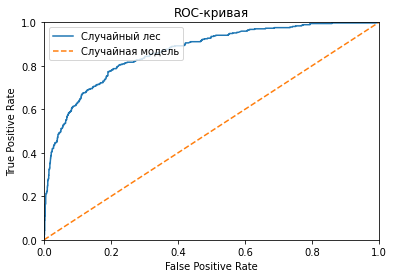

In [46]:
plt.figure()
plt.plot(fpr_forest,tpr_forest)
plt.plot([0, 1], [0, 1], linestyle='--')#ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайный лес', 'Случайная модель'), loc= 'upper left') 
plt.show()

## 5. Вывод

В результате исследования были рассмотрены две модели - Случайный лес и логистическая регрессия.

При рассмотрении данных с дисбалансом среди моделей Дерево решений и логистическая регрессия, лучшей моделью оказалось Дерево решений F1 мера=0,62, Auc_roc=0,87 на валидационной выборке, у логистической регрессии F1 мера = 0,33, Auc_roc=0,79.

При рассмотрении сбалансированных данных на валидационной выборке я получила следующие значения F1 меры:
1. Увеличение выборки: 
Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,650, Auc_roc=0,873
Логистическая регрессия F1 мера=0,51,  Auc_roc=0,79
2. Уменьшение выборки:
Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,39, Auc_roc=0,62
Логистическая регрессия F1 мера=0,31, Auc_roc=0,52.
3. взвешивание классов
Случайный лес(max_depth=19, n_estimators=61) F1 мера=0,648, Auc_roc=0,872
Логистическая регрессия F1 мера=0,51,  Auc_roc=0,79.

Лучший показатель F1 меры=0,65 у Случайного леса на сбалансированной (увеличением) выборке - выбираем это лучшей моделью для проверик на тестовых данных. 

Зналение F1 меры у модели Случайный лес = 0,61, Auc_roc=0,87, на тестовой выборке показатель немного хуже, чем на валидационной.

Аuc-roc случайного леса = 0,87.